# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | LEMARCHANT HUGO - LEMH03039705 * TAN ELODIE - TANE25619607 * JACQUES-SYLVAIN LECOINTRE LECJ19128301 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | C                                                       |
| Numéro du laboratoire | 02                                                      |
| Professeur            | Prof. Hervé Lombaert                                    |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 11/10/2018                                              |

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os, random
import math
import collections
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.ndimage as nd
import csv
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from IPython.display import Markdown

## Spam

In [2]:
df = pd.read_csv('spam.csv', delimiter = ',', header=None)
X_mail = df.loc[:, 0:56].values
Y_mail = df.loc[:, 57].values

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(X_mail, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)
df.groupby(57).count()[0].divide(df.shape[0])

57
0    0.599638
1    0.400362
Name: 0, dtype: float64

La répartition des données montre environ 60% de courriels 'non spam' et 40% de courriels 'spam' comme indiqué dans l'énoncé.

La repartition des classes (60% => 0 | 40% => 1) dans les ensembles de données est bien respectée comme demontré ci-dessous :

In [3]:
print('Repartition des donnees dans l\'emsemble d\'entrainement : {0}'.format(collections.Counter(Ym_train).most_common(2)))
print('Repartition des donnees dans l\'emsemble de test :{0}'.format(collections.Counter(Ym_test).most_common(2)))

Repartition des donnees dans l'emsemble d'entrainement : [(0, 1324), (1, 884)]
Repartition des donnees dans l'emsemble de test :[(0, 331), (1, 221)]


### Arbres de décision

#### Max-depth : None , 3, 5, 10

In [4]:
sthree_acc = []
sthree_f1 = []

for depth in (None,3, 5, 10):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    sthree_acc.append(acc)
    sthree_f1.append(f1)

### Arbres de décision - Accuracy & F1 Score

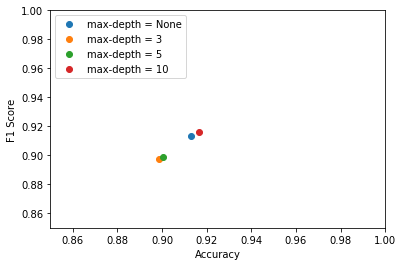

In [5]:
for i, label in zip(range(0, 4), (None, 3, 5, 10)):
    plt.plot(sthree_acc[i], sthree_f1[i], "o", label='max-depth = {}'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.85, 1])
plt.ylim([0.85, 1])
plt.show()

### Arbres de décision - Cross validation

D'après le graphique des $Accuracy$ et $F1 scores$, on se rend compte que le meilleur hyperparamètre pour les arbres de décision pour Spam est `max-depth = 10`. La validation croisée sera donc effectuée avec l'hyperparamètre `max-depth = 10`.

In [6]:
K = 10
for md in [5,10]:
    clf = tree.DecisionTreeClassifier(max_depth = md)
    sthree_CV_scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
    print('max_depth : {0} F1 score: {1}'.format(md,sum(sthree_CV_scores)/K))

max_depth : 5 F1 score: 0.9068710206760748
max_depth : 10 F1 score: 0.9195562848703643


### KNN 
#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [7]:
sKNN_acc_uniform = []
sKNN_f1_uniform = []

sKNN_acc_distance = []
sKNN_f1_distance = []

In [8]:
for n_neigh in (3, 5, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='uniform')

    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    sKNN_acc_uniform.append(acc)
    sKNN_f1_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='distance')
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    sKNN_acc_distance.append(acc)
    sKNN_f1_distance.append(f1)

### KNN - Accuracy & F1 Scores

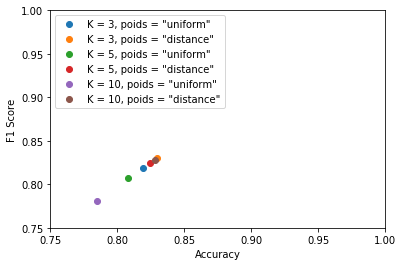

In [9]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(sKNN_acc_uniform[i], sKNN_f1_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(sKNN_acc_distance[i], sKNN_f1_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.75, 1])
plt.ylim([0.75, 1])
plt.show()

### KNN - Cross-validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que l'hyperparamètre `K` pour Spam est `K = 3` La validation croisée sera donc effectuée avec l'hyperparamètre `K = 3` et `poids = distance`.

In [10]:
fold = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
sKNN_scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(sKNN_scores)/K)

0.8029222185756482


### Bayes Naive
#### Distribution Gaussienne

##### Hold-out validation

In [11]:
clf = GaussianNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

sgauss_acc = accuracy_score(Ym_test, Y_pred)
sgauss_f1 = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(sgauss_acc))
print("Score F1 : {}".format(sgauss_f1))

Précision : 0.8387681159420289
Score F1 : 0.8402037805334562


##### 10-fold cross validation

In [12]:
K = 10
clf = GaussianNB()
scores = cross_val_score(clf, X_mail, Y_mail, cv=K)
print(sum(scores)/K)

0.8122848703642929


#### Distribution  Multinomiale

#### Validation hold-out

In [13]:
est = KBinsDiscretizer(n_bins = 10, encode='ordinal')
est.fit(X_mail) 
Xt_mail = est.transform(X_mail)

scaler = preprocessing.MinMaxScaler()
Xm_scaled = scaler.fit_transform(Xt_mail)

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm_scaled, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

clf = MultinomialNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

smulti_acc = accuracy_score(Ym_test, Y_pred)
smulti_f1 = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(smulti_acc))
print("Score F1 : {}".format(smulti_f1))


Précision : 0.907608695652174
Score F1 : 0.9081476031094811


##### Validation croisée

In [14]:
K = 10
clf = MultinomialNB()
smulti_scores = cross_val_score(clf, Xm_scaled, Y_mail, cv= K)
print(sum(smulti_scores)/K)

0.8804200853298326


### Forêts aléatoires (random forest)

In [15]:
param_grid = {
    'max_depth': [3,5,10,20,30,40,50,100],
    'n_estimators': [10,20,30,40,50,100,200,300]
}

grid_search = GridSearchCV(estimator =  RandomForestClassifier(), param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 0)
grid_search.fit(Xm_train, Ym_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 10, 20, 30, 40, 50, 100], 'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
clf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],max_depth=grid_search.best_params_['max_depth'])
clf.fit(Xm_train,Ym_train)
Y_pred = clf.predict(Xm_test)
srandfor_acc = accuracy_score(Ym_test, Y_pred)
srandfor_f1 = f1_score(Ym_test, Y_pred, average='weighted') 
print("Précision : {}".format(srandfor_acc))
print("Score F1 : {}".format(srandfor_f1))

Précision : 0.9528985507246377
Score F1 : 0.9527038522735986


**Validation croisée pour les forêts aléatoires**

In [17]:
scores = cross_val_score(clf, Xm_test, Ym_test, cv= K)
print(sum(scores)/K)

0.9384370015948964


## Analyse de galaxies

Nous n'avons pas utilisé la recherche par grille pour les données Spam, mais nous allons l'utiliser ici pour définir les meilleurs hyperparamètres pour l'algorithme des K-plus proches voisins. Nous aurions pu l'utiliser dans les cas précédents mais cela ne change rien en terme de résultats purs.

In [18]:
feature_vectors = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
labels = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',')
X_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,0:-1]
Y_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,-1:].astype(int).flatten()
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

**Nous utilisons les caractéristiques du TP1 dans le vecteur d'entrée, combinées aux caractéristiques de galaxy_feature_vectors données par le TP2. (qu'est ce qui garantit que l'ordre des observations de galaxy_feature_vectors.csv soit le même que celles du TP1 ? )**

In [19]:
X_galaxy_TP1 = pd.read_csv('vectors_TP1.csv', delimiter = ',').values[:,0:2]
# utilisons uniquement circularite et aspect ratio ratio
X_galaxy_TP1_1= np.concatenate([X_galaxy,X_galaxy_TP1[:,0:2]],axis=1)
Xgtp1_train, Xgtp1_test, Ygtp1_train, Ygtp1_test = train_test_split(X_galaxy_TP1_1, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

Nous observons une incohérence dans les classes de sortie entre `galaxy_feature_vectors.csv` et `galaxy_label_data_set.csv` comme montré ci-dessous :

In [20]:
print("galaxy_feature_vectors")
print(pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)[75].head(6))

print("galaxy_label_data_set")
print(labels.head(6)) 

galaxy_feature_vectors
0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: 75, dtype: float64
galaxy_label_data_set
       id   class
0  100090  smooth
1  100134  spiral
2  100322  spiral
3  100380  spiral
4  100458  smooth
5  100479  smooth


En effet, dans `galaxy_feature_vectors`, la classe 1 correspond à $smooth$ alors que la classe 0 correspond à $spiral$. Cependant, dans `galaxy_label_data_set`, les classes ne correspondent pas à `galaxy_feature_vectors`. Nous avons donc choisi de ne pas utiliser nos primitives trouvées dans le TP1 dans nos analyses.

### KNN 

In [21]:
gKNN_acc_uniform = []
gKNN_f1_uniform = []

gKNN_acc_distance = []
gKNN_f1_distance = []

In [22]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[3, 5, 10]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(X_galaxy, Y_galaxy)

print(clf.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}


#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [23]:
for n_neigh in (3, 5, 10):

    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='uniform')

    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    gKNN_acc_uniform.append(acc)
    gKNN_f1_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='distance')
    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    gKNN_acc_distance.append(acc)
    gKNN_f1_distance.append(f1)

#### KNN - Accuracy & F1 Scores

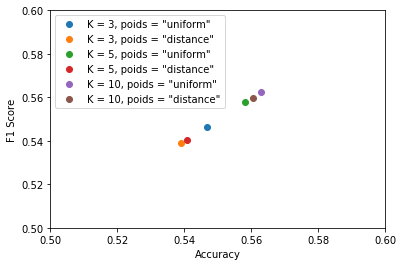

In [33]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(gKNN_acc_uniform[i], gKNN_f1_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(gKNN_acc_distance[i], gKNN_f1_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.5, 0.6])
plt.ylim([0.5, 0.6])
plt.show()

#### KNN - Cross-validation
Les meilleurs hyperparamètres renvoyés par `Grid Search` sont `K = 10` et `poids = distance`. Cependant, lorsque nous exécutons les différentes commandes sans passer par la fonction, nous obtenons de meilleurs résultats lorsque `K = 10` et que le `poids = uniforme`. Nous allons donc faire la validation croisée avec les deux hyperparamètres.

In [34]:
nfold = 10
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
gKNN_scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv=nfold)
print (gKNN_scores)
print(sum(gKNN_scores)/nfold)

[0.58865248 0.57446809 0.57362507 0.54405677 0.56771141 0.56002365
 0.5556213  0.58047337 0.5556213  0.57159763]
0.5671851089912532


In [35]:
nfold = 10
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv=nfold)
print (scores)
print(sum(scores)/nfold)

[0.58510638 0.57269504 0.56357185 0.5487877  0.56830278 0.5505618
 0.57159763 0.57928994 0.56331361 0.5704142 ]
0.5673640930790169


Nous remarquons que la validation croisée pour `K = 10` et `poids = distance` donne, quoique d'une différence très minime, un meilleur résultat. Nous pouvons donc dire que l'utilisation de `Grid Search` pour la recherche des meilleurs hyperparamètres est tout de même meilleure qu'une recherche faite "soi-même" dans ce cas là.

### Bayes
#### Loi Gaussienne (normale)

In [38]:
clf = GaussianNB()
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

ggauss_acc = accuracy_score(Yg_test, Y_pred)
ggauss_f1 = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(ggauss_acc))
print("Score F1 : {}".format(ggauss_f1))

Précision : 0.797752808988764
Score F1 : 0.797131047668415


#### Loi Multinomiale

In [39]:
est = KBinsDiscretizer(n_bins = 10, encode='ordinal')
est.fit(X_galaxy) 
Xt_galaxy = est.transform(X_galaxy)

scaler = preprocessing.MinMaxScaler()
Xg_scaled = scaler.fit_transform(Xt_galaxy)

Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(Xg_scaled, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

*Recherche de l'hyperparamètre $alpha$ pour la loi multinomiale*

In [40]:
NBParamGrid = dict(alpha=np.linspace(0,2,20)[1:])
paramsearch = GridSearchCV(estimator=MultinomialNB(), param_grid=NBParamGrid, n_jobs=6,cv=10)
paramsearch.fit(Xg_train, Yg_train)
selected_alpha = paramsearch.best_estimator_.alpha
print(selected_alpha)

1.1578947368421053


La meilleure valeur de alpha est 1.158 d'après `Grid Search` et sera utilisée par la suite pour la validation.

#### Bayes - Loi multinomiale - avec validation hold-out

In [41]:
clf = MultinomialNB(alpha=selected_alpha)
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

gmulti_acc = accuracy_score(Yg_test, Y_pred)
gmulti_f1 = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(gmulti_acc))
print("Score F1 : {}".format(gmulti_f1))

Précision : 0.7965700768775872
Score F1 : 0.7965745650692521


On remarque que l'utilisation de la loi multinomiale avec les hyperparamètres `MinMaxScaler` et `K-Bins discretization` donne une meilleure précision et score F1. Nous allons donc les utiliser pour la validation croisée.

#### Bayes - Loi multinomiale - avec validation croisee

In [42]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
scores = cross_val_score(clf, Xg_scaled, Y_galaxy, cv= K)
print(sum(scores)/K)

0.8009194601819851


Nous allons maintenant effectuer le test de classification pour la loi multinomiale avec les primitives calculées dans le TP1, ajoutées aux autres primitives données dans le TP2. En effet, puisque nous avons trouvé une incohérence dans les deux datasets précédemment, nous avons préféré ne pas utiliser au début de nos analyses ces données.

In [43]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
XgTP1_scaled = scaler.fit_transform(X_galaxy_TP1_1)
gmulti_scores = cross_val_score(clf, XgTP1_scaled, Y_galaxy, cv= K)
print(sum(gmulti_scores)/K)

0.7943571144847276


## Question 1
### Méthode de création des ensembles de données

Nous avons essentiellement utilisé les méthodes de la librairie `Scikitlearn` pour créer nos ensembles de données. Nous utilisons `train_test_split` pour entraîner des algorithmes avec des validations en holdout, et `cross_val_score` pour des entraînements avec validation croisée. Cette librairie nous offre des moyens simples d'utilisation pour générer des ensembles de tailles pré-déterminée (20% des données sont resevées au test et 80% pour l'entraînement) en respectant les proportions respectives de chaque classe dans le jeu de données et ce pour simuler des conditions au plus proche d'un cas d'utilisation réelle compte tenu de nos données.La validation croisée avec permet d'utiliser plus efficacement le jeu de données tout en gardant une complexité raisonnable.
Nous avons aussi utilisé Pandas qui est une librairie permettant de mieux gérer des données structurées (`dataframes`). Nos données `Galaxies` sont constituées des primitives données pour le TP2 ainsi que nos anciennes primitives concaténées. Cependant, nous avons remarqué une inconsistance dans les étiquettes, c'est pourquoi, pour certains de nos tests, nous n'utilisons que les données données.Les vecteurs de caracteristiques pour les `Galaxies` contiennent bien les étiquettes dans la dernière colonne mais rien n'indique les noms des fichiers correspondants et il est donc difficile de faire le lien avec le fichier des primitives calculées lors du TP1.

## Question 2
### Approche de validation proposée et justification
Nous avons choisi de pratiquer des validations croisées pour valider la totalité de nos apprentissages car nous pensons que c'est le meilleur compromis parmi K-fold cross-validation, leave-one-out, leave-P-out (coûteuses en resources) et holdout (coûteux en données). En effet,cette technique de validation nous permet de tester suffisamment de cas de figures d'entraînement pour être confiant sur l'apprentissage suffisamment général par rapport à holdout mais sans pour autant être aussi gourmand en ressources que leave-one-out ou leave-P-out. La méthode holdout permet de tester rapidement nos méthodes de classification et pour avoir une idée de l'erreur entre les véritables données, mais pour avoir l'erreur la plus représentatrice, nous utilisons ensuite les validations croisées. 

## Question 3
### Matrice des expérimentations


In [44]:
Markdown("""|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = {0}, F1 = {1}|None|
|Arbre de décision d=5|Acc = {2}, F1 = {3}|None|
|Arbre de décision d=10|Acc = {4}, F1 = {5}|None|
|Arbre de décision d=None|Acc = {6}, F1 = {7}|None|
|Arbre de décision 10-CV|{8}|None|
|3-NN Uniform|Acc = {9}, F1 = {10}|Acc = {11}, F1 = {12}|
|3-NN Distance|Acc = {13}, F1 = {14}|Acc = {15}, F1 = {16}|
|5-NN Uniform|Acc = {17}, F1 = {18}|Acc = {19}, F1 = {20}|
|5-NN Distance|Acc = {21}, F1 = {22}|Acc = {23}, F1 = {24}|
|10-NN Uniform|Acc = {25}, F1 = {26}|Acc = {27}, F1 = {28}|
|10-NN Distance|Acc = {29}, F1 = {30}|Acc = {31}, F1 = {32}|
|3-NN Distance 10-CV|{33}|{34}|
|Bayes Gaussian|Acc = {35}, F1 = {36}|Acc = {37}, F1 = {38}|
|Bayes Multinomial|Acc = {39}, F1 = {40}|Acc = {41}, F1 = {42}|
|Bayes Multinomial 10-CV|{43}|{44}|
""".format(sthree_acc[1], sthree_f1[1], sthree_acc[2], sthree_f1[2], sthree_acc[3], sthree_f1[3], sthree_acc[0], sthree_f1[0], 
           sum(sthree_CV_scores)/10, sKNN_acc_uniform[0], sKNN_f1_uniform[0], gKNN_acc_uniform[0], gKNN_f1_uniform[0], 
           sKNN_acc_distance[0], sKNN_f1_distance[0], gKNN_acc_distance[0], gKNN_f1_distance[0], 
           sKNN_acc_uniform[1], sKNN_f1_uniform[1], gKNN_acc_uniform[1], gKNN_f1_uniform[1], 
           sKNN_acc_distance[1], sKNN_f1_distance[1], gKNN_acc_distance[1], gKNN_f1_distance[1],
           sKNN_acc_uniform[2], sKNN_f1_uniform[2], gKNN_acc_uniform[2], gKNN_f1_uniform[2], 
           sKNN_acc_distance[2], sKNN_f1_distance[2], gKNN_acc_distance[2], gKNN_f1_distance[2],
           sum(sKNN_scores)/10, sum(gKNN_scores)/nfold,
           sgauss_acc, sgauss_f1, ggauss_acc, ggauss_f1,
           smulti_acc, smulti_f1, gmulti_acc, gmulti_f1,
           sum(smulti_scores)/10, sum(gmulti_scores)/K))

|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = 0.8985507246376812, F1 = 0.897740031205263|None|
|Arbre de décision d=5|Acc = 0.9003623188405797, F1 = 0.8990733553257645|None|
|Arbre de décision d=10|Acc = 0.9166666666666666, F1 = 0.9160850056088745|None|
|Arbre de décision d=None|Acc = 0.9130434782608695, F1 = 0.9130434782608695|None|
|Arbre de décision 10-CV|0.9195562848703643|None|
|3-NN Uniform|Acc = 0.8188405797101449, F1 = 0.818407660148391|Acc = 0.5467179183914843, F1 = 0.546580009350169|
|3-NN Distance|Acc = 0.8297101449275363, F1 = 0.8297101449275363|Acc = 0.539030159668835, F1 = 0.538831071662403|
|5-NN Uniform|Acc = 0.8079710144927537, F1 = 0.807347603796286|Acc = 0.5582495564754583, F1 = 0.5580209973466429|
|5-NN Distance|Acc = 0.8242753623188406, F1 = 0.8242086503869479|Acc = 0.5408042578356003, F1 = 0.5405746872272853|
|10-NN Uniform|Acc = 0.7844202898550725, F1 = 0.7813752527940205|Acc = 0.5629804849201656, F1 = 0.5625866823342862|
|10-NN Distance|Acc = 0.8278985507246377, F1 = 0.8275590465636746|Acc = 0.560615020697812, F1 = 0.5598099126473268|
|3-NN Distance 10-CV|0.8029222185756482|0.5671851089912532|
|Bayes Gaussian|Acc = 0.8387681159420289, F1 = 0.8402037805334562|Acc = 0.797752808988764, F1 = 0.797131047668415|
|Bayes Multinomial|Acc = 0.907608695652174, F1 = 0.9081476031094811|Acc = 0.7965700768775872, F1 = 0.7965745650692521|
|Bayes Multinomial 10-CV|0.8804200853298326|0.7943571144847276|


### Etude des hyperparamètres

#### Arbres de décision  

D'après nos données, ne pas limiter la profondeur de l'abre créee un sur-apprentissage, il est donc préférable de limiter celle-ci. Pour les 3 valeurs testées ,plus la profondeur de l'arbre est élevée, plus la précision et les scores F1 sont élevés.
Le gain d'information et donc la pureté de nos ensembles de données s'améliore en augmentant cette profondeur.Dans le cas des données de spams, Une profondeur de 10 ne semble pas causer de sur-apprentissage et permet d'obtenir les meilleurs résultats avec un F1 score de 0.9185.Cependant avec une prodondeur de 5 le F1 score est assez proche 0.90759 et dépendemment de l'application que l'on souhaite mettre en place il faudra prendre en compte la complexité de le l'arbre et une profondeur de 5 semble etre un bon compromis complexité/performance.

#### KNN  
`poids = uniform` veut dire que la pondération de chaque voisin est uniforme et ne dépend pas de la distance au point.
L'option `poids = distance` pondère différement chaque voisin pour la décision de l'algorithme KNN. Cette pondération est inversement proportionnelle a la distance au point a classifier.
La distance utilisée est celle par defaut donc ‘minkowski’ avec p=2 ce qui équivaut à la distance Euclidienne.

Dans le cas des spams, les meilleurs hyperparamètres sont : `nombre de voisins = 3` et `poids = distance`. Nous pouvons expliquer cela par le fait que lorsque k est trop grand, le biais est important et on risque un sous-apprentissage. `K = 3` semble etre un bon compromis biais/variance sans introduire de sur-apprentissage. La performance de cet algorithme est également a prendre en compte car la pondération par distance introduit de la lenteur dans l'exécution O(nd+nk).

Pour les galaxies, les meilleurs hyperparamètres sont : `nombre de voisins = 10` et `poids = distance`. Le nombre de voisins optimal est supérieur que pour les données `spam` car les données sont plus éparses. En effet, les galaxies sont des images, et la classification d'images grâce à leurs primitives est généralement plus difficile que pour des données plus "directes" comme le nombre de mots dans un mail... Il faut donc un nombre de voisins plus élevé pour que le choix soit plus optimal. Cependant ce modèle ne semble pas adapté à ce jeu de données.


Nous pouvons remarquer que lorsque l'hyperparamètre du poids est égal à $distance$, les résultats sont significativement meilleurs. En effet, les voisins les plus proches aideront à mieux discriminer le point étudié.


#### Bayes 

Deux hypothèses de distributions ont été étudiées dans ce projet, la loi normale et la distribution multinomiale. Pour cette dernière, il s'agit d'une généralisation de la loi de Bernouilli (succès de n épreuves) pour des variables de nature catégorielle (discrètes) comme c'est le cas pour `spam` ou `galaxies`.

L'impact de l'hyperparamètre alpha a été évalué pour cette distribution pour la classifiaction de galaxies. Alpha est un hyperparamètre de lissage pour les variables catégorielles.


Pour nos deux jeux de données, le meilleur résultat sont obtenus grâce à l'algorithme de Bayes naïf multinomial, avec `MinMaxScaler` et la `K-Bins discretization`.   

D'après la définition de Scikit-learn, `MinMaxScaler` transforme les primitives en les mettant à l'échelle entre 0 et 1. Cela permet de minimiser les différences d'échelle entre les différents attributs. (Ex : un attribut entre 0 et 1000 et un attribut entre 0 et 1).

`KBinsDiscretizer` permet de discrétiser les attributs continus que nous avons en entrée. Cela permet de réduire les différences entre les différentes valeurs que peut prendre l'attribut, ce qui permet de mieux les regrouper entre eux.

Ces meilleurs résultats peuvent s'expliquer par le fait que pour les algorithmes, il est plus facile de différencier des valeurs discrètes qu'une infinité de valeurs différentes (ce qui semble assez logique). En effet, une partie de la classification est déjà faite sur les primitives. De plus, mettre à l'échelle les différentes primitives permet de ne pas sur-interpréter les données qui sont sur une grande échelle. 

#### Forêts aléatoires (random forest)

Les hyperparamètres pour le modèle des forêts aléatoires ont été déterminés avec une recherche par grille (`Grid Search`). La profondeur des arbres (max_depth) est un hyperparamètre a considérer ainsi que le nombre d'arbres (n_estimators).La profondeur maximale utilisée est 20 avec 30 arbres.La profondeur de l'arbre a un impact sur la generalisation de l'algorithme a de nouvelles données et plus l'arbre est profond plus la variance et grande avec un biais faible (possibilités de sur-apprentissage)
A 'inverse, un arbre trop peu profond a une petite variance mais un biais (erreur) élevé,c'est le cas du sous-apprentissage. La Sensibilité au bruit des arbres de décison peut etre attenuee avec les forets aleatoires en introduisant un vote des arbres pour la classe majoritaitre.L'hyperparamètre `n_estimators` correspond au nombre d'arbres et ameliore globalement les performances de classifications avec un n élevé mais les ressources mémoire consomées augmentent (n=300 dans notre analyse).



## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

D'après nos différentes analyses, les ensembles de données qui se démarquent le mieux sont ceux dont les attributs sont discrétisés. En effet, comme expliqué précédemment, cela permet de regrouper un ensemble de valeurs différentes. Pour ce qui est de la taille des ensembles de données, nous avons beaucoup moins d'exemples pour `Spam` que pour `Galaxies`. Cependant, le cas des spams donne des erreurs beaucoup plus faibles que le cas des galaxies. Nous pouvons expliquer cela par le fait que les primitives de Spam sont plus discriminantes que celles des galaxies. Nous pouvons donc déduire de ces exemples que la taille des ensembles des données n'aide pas forcément à une meilleure classification des données. En effet, la qualité des primitives joue un rôle principal dans les performances de classification. Cependant, lorsque les privitives discriminent bien les données par essence,une augmentation du nombre d'observations permettre d'améliorer les performances de classification des données.

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

On sait que les données extraites de l'analyse des images de galaxies sont plus bruitées que celles extraites des courriels.Une étape de nettoyage des données avant l'extraction des primitives permettra de limiter l'impact du bruit.
Par conséquent en testant chaque classifieur avec les mêmes hyperparamètres pour nos deux problématiques de classification, nous sommes en mesure de comparer l'impact du bruit sur la classification.
Etant donné que nous avons déja constaté que les résultats des arbres de classification n'étaient pas très bons, nous pouvons conclure que ce type de classification est très sensible au bruit. D'ailleurs, pour la classification des courriels, on obtient un score de plus de 90% comparé au 75% pour les galaxies dans le lab précédent.

D'après les observations des résultas de KNN, il semblerait que ce classifieur soit encore plus sensible au bruit que les arbres de classification.

D'un autre côté les classifieurs naïfs guassiens ou multinomiaux semblent moins sensibles au bruit mais n'améliorent pas la classification d'un ensemble peu bruité comparé aux résultats obtenus dans KNN ou par arbres de décision avec les courriels.

## Question 6
### Discussion sur la nature des données

Les données `Spam` sont extraites de différents mails, qui sont eux même composés d'une série de mots. Les données `Galaxy` sont quant à elles des images. Il est clairement plus difficile d'extraire de bonnes primitives discriminantes sur des images que sur du texte. En effet, il faut tout d'abord effectuer plusieurs pré-traitements sur les images pour pouvoir extraire des données qui ne sont pas complètement sûres, par rapport à un nombre d'enchainement de mots écrits en majuscule dans un texte par exemple.  
C'est pourquoi nous arrivons mieux à classifier les mails en Spam que les différents types de galaxies.

Pour les données comme `Spam`, le meilleur algorithme est celui des arbres de décision (et des forets aleatoires), d'après le tableau de résultats. En effet, il est plus facile de donner un seuil pour ces variables qui va classifier au mieux nos données. Les algorithmes KNN sont moins performants car nous avons 57 attributs donc autant de dimensions. La notion de distance dans 57 dimensions n'est pas assez discriminante. 
Pour les données de Spam , il est judicieux d'utiliser une méthode d'estimation paramétrique car l'hypothese d'une distribution multinomiale est plausible.L'algorithme Bayésien naïf a une performance similaire aux arbres de décision pour les raisons expliquées dans la question 3 (l'estimation d'une distribution multinomiale se prete bien a ce cas de figure).

Pour les données `Galaxies`, les deux algorithmes de Bayes naïf s'équivalent. Les mêmes raisons s'appliquent pour le multinomial.Lorsque le Nombre d'echantillions est assez grand,la distribution multinomiale tend vers une Gaussienne ce qui explique que les performances s'équivalent. Pour le cas gaussien, il permet d'atténuer de manière significative les valeurs abérrentes, qui se trouvent en quantité considérable dans notre jeu de données. C'est justement l'énorme portée des variables ainsi que l'incertitude liée à nos primitives qui rendent les algorithmes des arbres de décision peu efficaces pour cette nature de données.De même, comme expliqué précédemment, le bruit limite toute chance au KNN de bien classifier nos données.

## Question 7
### Recommandations

Après avoir anaylisé les résultats, nous pouvons en déduire un ensemble de pratiques pertinentes a mettre en oeuvre en fonction de la nature des données qui nous sont proposées.
Tout d'abord, lorsque pour la classification d'images il semble essentiel de discrétiser les caractéristiques de sorte à réduire l'impact du bruit sur la prise de décision. Cela semble être un traitement qui va dans le sens de la généralisation de l'apprentissage. Les caractéristiques une fois discrétisées sont alors mieux adaptées à des méthodes de classification Bayésiennes telles que des classifieurs Gaussiens ou Multinomiaux.

Pour des données moins bruitées il nous semble qu'aucune technique de classification ne prévale au vu de nos résultats, cependant nous savons que toutes les techniques ne sont pas aussi gourmandes en ressources mémoire ou temps de calcul. Partant de ce constat, les méthodes KNN sont trop gourmandes ( O(nd+nk) et aussi légèrement moins précises) et donc à éviter si possible. KNN fonctionne mieux pour un nombre plus limité de caractéristiques et ou la notion de distance est pertinente.

## Question 8
### Améliorations possibles

Pour les données `Spam`, si nous voulons appliquer l'algorithme des K-PPV, nous pouvons réduire la dimensionnalité des attributs pour enlever ceux qui sont les plus correlés entre eux (décrire l'objet avec un nombre minime d'attributs qui ne sont pas liés les uns aux autres). Cela permettrait d'améliorer la notion de distance pour mieux discriminer les pourriels.

Pour les données `Galaxies`, nous avons vu que les quelques méthodes discrétisation et de mises à l'échelle étaient très efficaces. Il existe sûrement d'autres méthodes que nous aurions pu utiliser pour améliorer notre classification.